L3

Residual error for Linear Regression model: 2992.581229301017
Residual error for Random Forest Regressor model: 3805.9517483146074
Residual error for Gradient Boosting Regressor model: 3747.777682485106
Linear Regression predictions for first 20 examples: [203.36320608  67.58403623 172.62055896 169.70130727 129.50082172
 107.06903899  74.13709552 118.328599   157.20901612 215.89882243
 100.57036328  98.54782792 114.26560898 160.81593647 100.4928484
 177.55894189 209.00533067 180.92495472 149.69368376 123.76416529]
Random Forest Regressor predictions for first 20 examples: [168.4   77.33 157.85 199.9   90.99 114.41  71.04  92.25 121.15 248.8
 106.38 107.7  133.87 181.3  109.95 182.75 190.44 196.86 118.93 136.94]
Gradient Boosting Regressor predictions for first 20 examples: [186.97440687  84.61320929 160.33627981 209.17829115 114.37972033
 111.89335967  70.09303689  76.60591517 125.37902825 252.07163541
 110.98192785 100.05946928 108.36065588 165.0336934  105.3119276
 177.35294357 184.7

Text(0.5, 0, 'training samples')

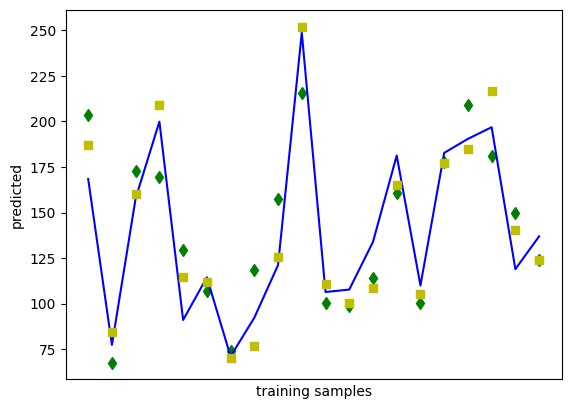

In [10]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

gb = GradientBoostingRegressor(random_state=1)
gb.fit(X_train, y_train)

#Prediction codes
lr_pred = lr.predict(X_test)
lr_residual = mean_squared_error(y_test, lr_pred)

rf_pred = rf.predict(X_test)
rf_residual = mean_squared_error(y_test, rf_pred)
gb_pred = gb.predict(X_test)
gb_residual = mean_squared_error(y_test, gb_pred)

print('Residual error for Linear Regression model:', lr_residual)
print('Residual error for Random Forest Regressor model:', rf_residual)
print('Residual error for Gradient Boosting Regressor model:', gb_residual)


X_subset = X[:20]
lr_subset_pred = lr.predict(X_subset)
rf_subset_pred = rf.predict(X_subset)
gb_subset_pred = gb.predict(X_subset)

print('Linear Regression predictions for first 20 examples:', lr_subset_pred)
print('Random Forest Regressor predictions for first 20 examples:', rf_subset_pred)
print('Gradient Boosting Regressor predictions for first 20 examples:', gb_subset_pred)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(lr_subset_pred, "gd", label="Gradient BoostingRegressor")
plt.plot(rf_subset_pred, "b", label="Random ForestRegressor")
plt.plot(gb_subset_pred, "ys", label="Linear Regression")
plt.tick_params (axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")



### Q L4

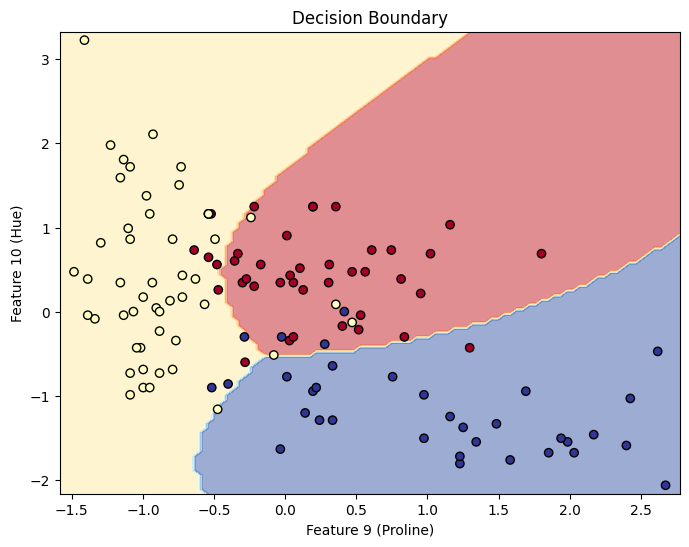

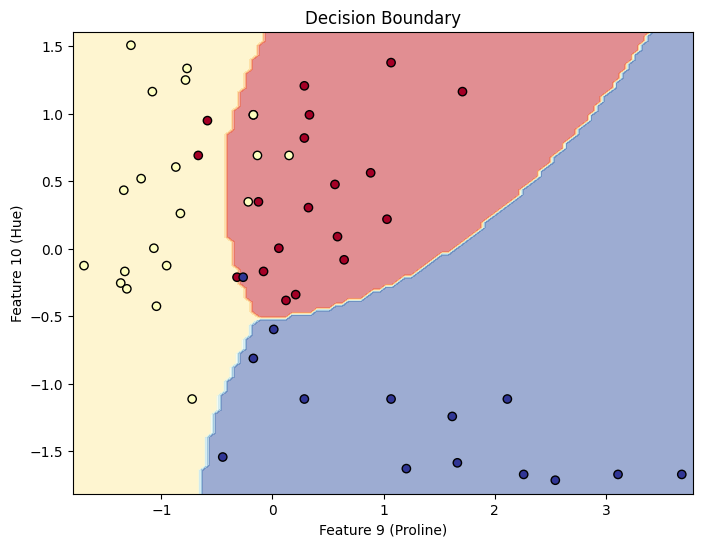

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, ax):
    # Define a grid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Use the classifier to predict the class of the grid points
    Z = clf.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training data
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="k")
    ax.set_xlabel("Feature 9 (Proline)")
    ax.set_ylabel("Feature 10 (Hue)")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Decision Boundary")


X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[:, [9, 10]])  # proline and hue
X_test_scaled = scaler.transform(X_test[:, [9, 10]])

clf = GaussianNB()
clf.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(clf, X_train_scaled, y_train, ax)
plt.show()

# Plot the decision boundary for the testing set
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(clf, X_test_scaled, y_test, ax)
plt.show()


### Q L5


In [27]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut

random.seed(22)

# Generate dataset of 100 points for regression
X = np.random.randn(100, 5)
w = np.array([0.2, 0.3, 0.4, 0.5, 0.6])
Y = np.dot(X, w) + np.random.randn(100)

# Adding a single outlier
outlier_index = int(random.random() * 100)
Y[outlier_index] = np.dot(X[outlier_index], w) + 10 * np.random.randn()

loo = LeaveOneOut()
reg = LinearRegression()
worst_error = 0
worst_error_index = 0
for train_index, test_index in loo.split(X):
    reg.fit(X[train_index], Y[train_index])
    error = abs(reg.predict(X[test_index]) - Y[test_index])
    if error > worst_error:
        worst_error = error
        worst_error_index = test_index[0]

print("Single outlier identified at index:", worst_error_index)
print("Actual outlier index:", outlier_index)


outlier_indices = random.sample(range(100), 5)
for i in outlier_indices:
    Y[i] = np.dot(X[i], w) + 10 * np.random.randn()

worst_error_indices = []
for train_index, test_index in loo.split(X):
    reg.fit(X[train_index], Y[train_index])
    error = abs(reg.predict(X[test_index]) - Y[test_index])
    if error > worst_error:
        worst_error = error
        worst_error_indices.append(test_index[0])

# Check if the identified outlier indices match the actual outlier indices
print("Outliers identified at indices:", worst_error_indices)
print("Actual outlier indices:", outlier_indices)
print('Number of Outliers:', len(outlier_indices))


Single outlier identified at index: 95
Actual outlier index: 95
Outliers identified at indices: [3]
Actual outlier indices: [17, 31, 3, 78, 57]
Number of Outliers: 5


### Q. L6

In [32]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
y_binary = np.where(y == 0, 1, 0)  # 1 for digit '0', 0 for digits '1' to '9'

# Train GaussianNB classifier
gnb = GaussianNB()
scores = cross_val_score(gnb, X, y_binary, cv=5, scoring='accuracy')

# Calculate average error
avg_error = 1 - np.mean(scores)
print("Average error: {:.2f}".format(avg_error))
from sklearn.metrics import confusion_matrix

gnb.fit(X, y_binary)
y_pred = gnb.predict(X)

# Generate confusion matrix
conf_mat = confusion_matrix(y_binary, y_pred)
print("Confusion matrix:\n", conf_mat)


Average error: 0.01
Confusion matrix:
 [[1602   17]
 [   0  178]]


### Q L7


In [34]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def dist(x1, x2):
    
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = [dist(x, x_train) for x_train in self.X_train]
            k_idx = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_idx]  
            most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(most_common)
        return y_pred

iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNN(k=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = np.mean(y_pred == y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


Q L8


c:\Users\anmol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


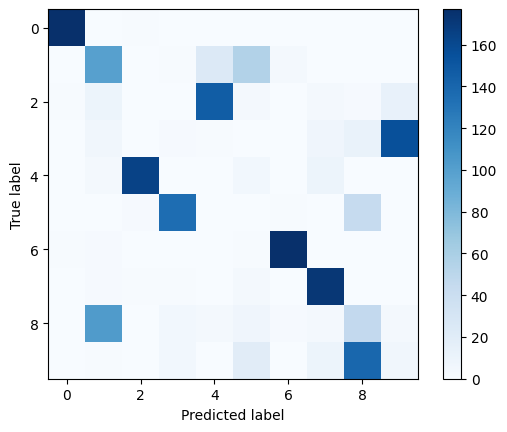

c:\Users\anmol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


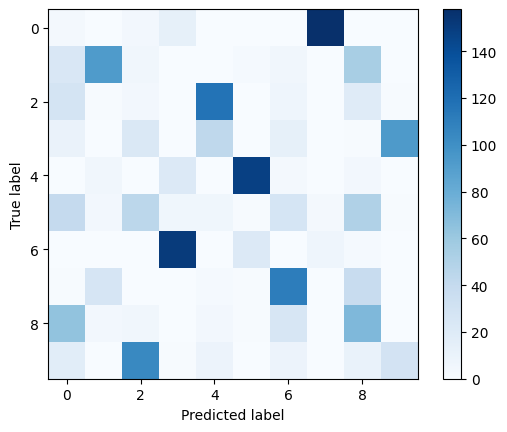

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Load the digits data
digits = load_digits()

# Add Gaussian noise with variance 1 to each image
noisy_digits = digits.data + np.random.normal(0, 1, size=digits.data.shape)

# KMeans clustering without PCA
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(noisy_digits)
predicted_labels = kmeans.labels_

# Plot the confusion matrix
cm = confusion_matrix(digits.target, predicted_labels)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# PCA with two components
pca = PCA(n_components=2)
pca.fit(noisy_digits)
transformed_digits = pca.transform(noisy_digits)

# KMeans clustering after PCA
kmeans_pca = KMeans(n_clusters=10, random_state=42)
kmeans_pca.fit(transformed_digits)
predicted_labels_pca = kmeans_pca.labels_

# Plot the confusion matrix
cm_pca = confusion_matrix(digits.target, predicted_labels_pca)
plt.imshow(cm_pca, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [37]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Load the digits data
digits = load_digits()

# Add Gaussian noise of variance 1 to every pixel
np.random.seed(42)
noisy_digits = np.random.normal(digits.data, 1)

# Perform k-means clustering on the noisy digits data
kmeans = KMeans(n_clusters=10, random_state=42)
predicted_labels = kmeans.fit_predict(noisy_digits)

# Build the confusion matrix for the noisy data
cm = confusion_matrix(digits.target, predicted_labels)

print("Confusion matrix for noisy data:")
print(cm)

# Perform PCA and keep only the first two components
pca = PCA(n_components=2, random_state=42)
pca.fit(noisy_digits)
pca_digits = pca.transform(noisy_digits)

# Perform k-means clustering on the PCA-reduced data
predicted_labels_pca = kmeans.fit_predict(pca_digits)

# Build the confusion matrix for the PCA-reduced data
cm_pca = confusion_matrix(digits.target, predicted_labels_pca)

print("Confusion matrix for PCA-reduced data:")
print(cm_pca)


Confusion matrix for noisy data:
[[  0   0   0   0   0   0   1   0   0 177]
 [ 55   0   0  99   1  23   0   1   3   0]
 [  2   2   3   9   0 149   0  11   0   1]
 [  0  13   6   8   2   0   0 154   0   0]
 [  6   0   8   3   0   0 164   0   0   0]
 [  0  43   0   0 134   0   2   1   2   0]
 [  0   0   0   2   0   0   0   0 178   1]
 [  1   0 175   3   0   0   0   0   0   0]
 [  8  43   7 101   6   4   0   3   2   0]
 [ 20 139   8   2   5   0   0   6   0   0]]
Confusion matrix for PCA-reduced data:
[[  0   0   0 157   0   2   1  14   4   0]
 [ 51   0   5   0  89  29   2   0   6   0]
 [ 11   2   9   0   0  39   0   0   3 113]
 [  0  91  13   0   0  11   0   0  29  39]
 [  5   0   3   0   7   0 146  20   0   0]
 [ 48   0  29   6   1  44   1   4  45   4]
 [  2   0   0   5   0   0  23 151   0   0]
 [ 34   0 114   0  30   1   0   0   0   0]
 [ 64   0  29   0   4  70   0   0   2   5]
 [  9  34   9   0   0  20   0   1 101   6]]


c:\Users\anmol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anmol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
